In [1]:
# ==============================
# 📊 Simplified Feedback Analysis
# ==============================

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("student_feedback.csv")



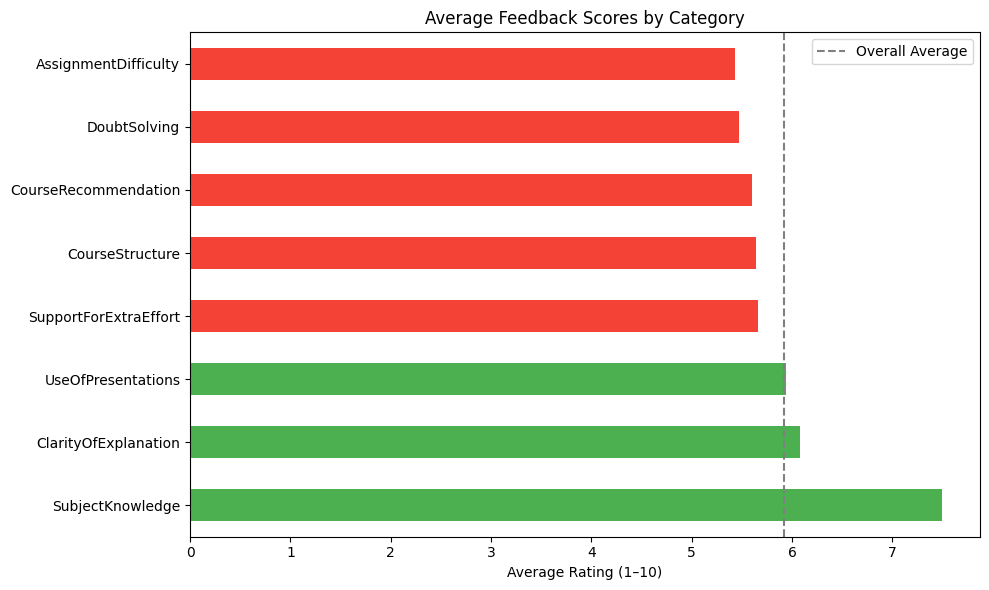

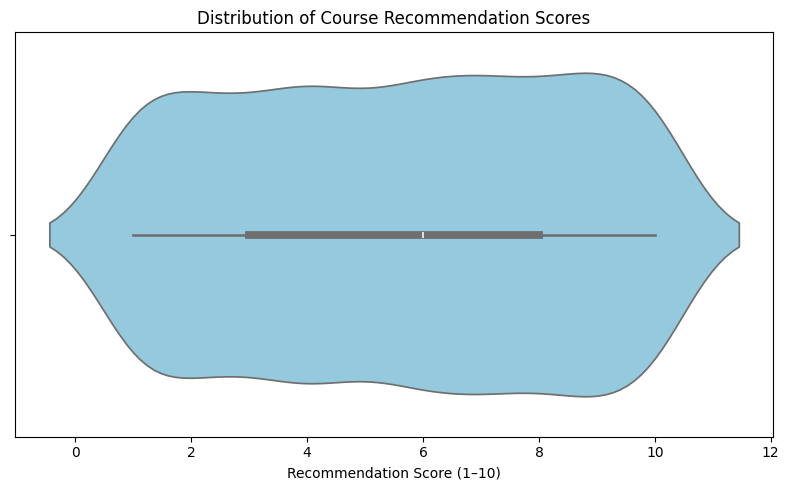

C:\Users\USER\AppData\Local\Temp\ipykernel_5228\3866382142.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


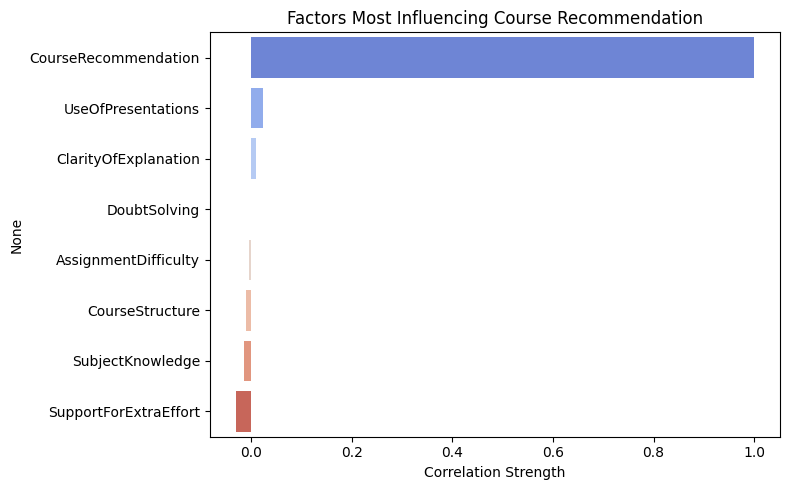

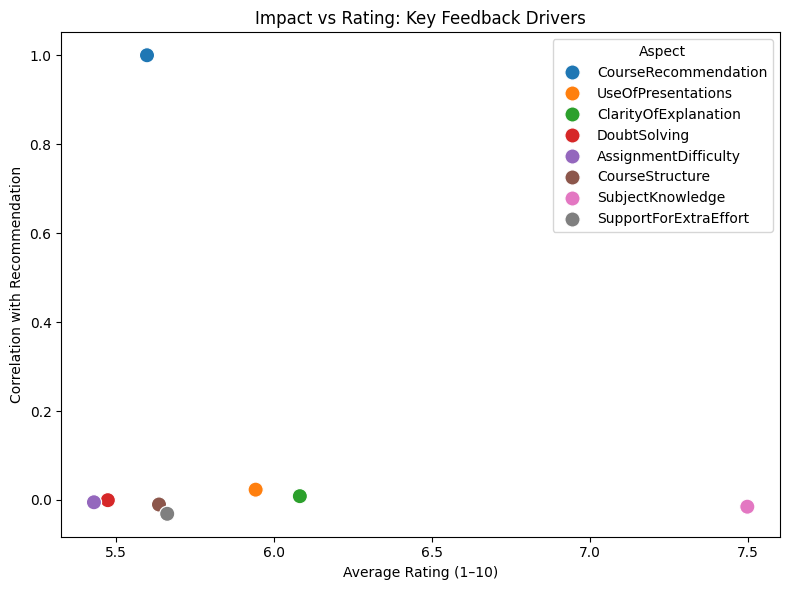


📋 BUSINESS INSIGHTS SUMMARY

1️⃣ Weak Areas (Need Improvement): AssignmentDifficulty, DoubtSolving, CourseRecommendation
2️⃣ Key Drivers of Recommendation: UseOfPresentations, ClarityOfExplanation, DoubtSolving
3️⃣ Highest Rated Aspect: SubjectKnowledge (7.50)
4️⃣ Lowest Rated Aspect: AssignmentDifficulty (5.43)

⚠️ Action Suggestion: Focus training and course redesign on weaker areas.

✅ End of Simplified Analysis Report


In [2]:
# Clean up data
df = df.drop(columns=df.columns[0], errors="ignore")  # drop unnamed index
df.columns = [
    'StudentID', 'SubjectKnowledge', 'ClarityOfExplanation',
    'UseOfPresentations', 'AssignmentDifficulty', 'DoubtSolving',
    'CourseStructure', 'SupportForExtraEffort', 'CourseRecommendation'
]

# Drop missing values if any
df = df.dropna()

# ---- Average Ratings per Category ----
avg_ratings = (
    df.drop(columns='StudentID')
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
avg = avg_ratings.mean()
colors = ['#4CAF50' if x > avg else '#F44336' for x in avg_ratings]
avg_ratings.plot(kind='barh', color=colors)
plt.axvline(avg, color='gray', linestyle='--', label='Overall Average')
plt.title('Average Feedback Scores by Category')
plt.xlabel('Average Rating (1–10)')
plt.legend()
plt.tight_layout()
plt.show()

# ---- Overall Satisfaction Distribution ----
plt.figure(figsize=(8,5))
sns.violinplot(x=df['CourseRecommendation'], inner='box', color='skyblue')
plt.title('Distribution of Course Recommendation Scores')
plt.xlabel('Recommendation Score (1–10)')
plt.tight_layout()
plt.show()

# ---- Correlation with Course Recommendation ----
rec_corr = (
    df.drop(columns='StudentID')
      .corr()['CourseRecommendation']
      .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(
    x=rec_corr.values,
    y=rec_corr.index,
    palette='coolwarm'
)
plt.title('Factors Most Influencing Course Recommendation')
plt.xlabel('Correlation Strength')
plt.tight_layout()
plt.show()

# ---- Combined Insight Chart ----
summary = pd.DataFrame({
    'Average Rating': avg_ratings,
    'Correlation with Recommendation': rec_corr
}).sort_values('Correlation with Recommendation', ascending=False)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=summary,
    x='Average Rating',
    y='Correlation with Recommendation',
    hue=summary.index,
    s=120
)
plt.title('Impact vs Rating: Key Feedback Drivers')
plt.xlabel('Average Rating (1–10)')
plt.ylabel('Correlation with Recommendation')
plt.legend(title='Aspect', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

# ---- Business Insights Summary ----
weak_areas = avg_ratings.nsmallest(3).index.tolist()
top_predictors = rec_corr.iloc[1:4].index.tolist()

print("\n" + "="*60)
print("📋 BUSINESS INSIGHTS SUMMARY")
print("="*60)
print(f"\n1️⃣ Weak Areas (Need Improvement): {', '.join(weak_areas)}")
print(f"2️⃣ Key Drivers of Recommendation: {', '.join(top_predictors)}")
print(f"3️⃣ Highest Rated Aspect: {avg_ratings.idxmax()} ({avg_ratings.max():.2f})")
print(f"4️⃣ Lowest Rated Aspect: {avg_ratings.idxmin()} ({avg_ratings.min():.2f})")

if avg_ratings.min() < 6:
    print("\n⚠️ Action Suggestion: Focus training and course redesign on weaker areas.")
else:
    print("\n✅ Overall performance looks good across all categories.")

print("\n✅ End of Simplified Analysis Report")
